In [2]:
legal_corpus = [
    "The court ruled in favor of the defendant in the civil case.",
    "Intellectual property law protects patents, copyrights, and trademarks.",
    "The plaintiff filed a lawsuit against the corporation for breach of contract.",
    "A judge must ensure due process is followed in all criminal trials.",
    "Legal precedents set by the Supreme Court influence lower court decisions.",
    "The attorney argued that the evidence was inadmissible in court."
]


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import string

#nltk.download('punkt')

# Preprocess the corpus
def preprocess_text(corpus):
    cleaned_corpus = []
    for sentence in corpus:
        tokens = word_tokenize(sentence.lower())  # Tokenization and lowercasing
        tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
        cleaned_corpus.append(tokens)
    return cleaned_corpus

# Preprocess the legal corpus
tokenized_corpus = preprocess_text(legal_corpus)

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("legal_word2vec.model")

print("Word2Vec model trained successfully!")

Word2Vec model trained successfully!


In [6]:
# Load the trained model
model = Word2Vec.load("legal_word2vec.model")

# Check similar words
word = "law"
if word in model.wv:
    similar_words = model.wv.most_similar(word, topn=5)
    print(f"Words similar to '{word}':")
    for w, sim in similar_words:
        print(f"{w}: {sim:.4f}")
else:
    print(f"'{word}' not in vocabulary")

Words similar to 'law':
property: 0.2466
followed: 0.1899
of: 0.1784
ruled: 0.1713
by: 0.1712


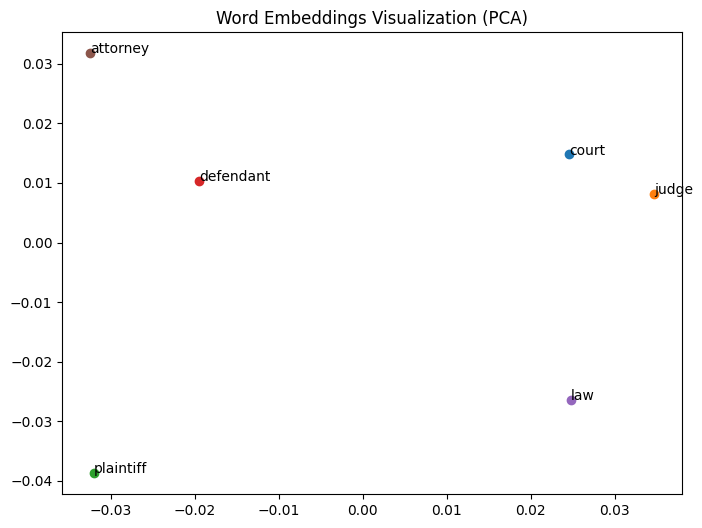

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Select words for visualization
words = ["court", "judge", "plaintiff", "defendant", "law", "attorney"]

# Extract word vectors
word_vectors = np.array([model.wv[word] for word in words if word in model.wv])
valid_words = [word for word in words if word in model.wv]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plot the words
plt.figure(figsize=(8, 6))
for i, word in enumerate(valid_words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.title("Word Embeddings Visualization (PCA)")
plt.show()